# Find and Load Sentinel-2 Data

Install dependencies with `pip install pystac_client odc-stac`.

You can run this notebook in VS Code with the Jupyter extension, or a range of other notebook environments.

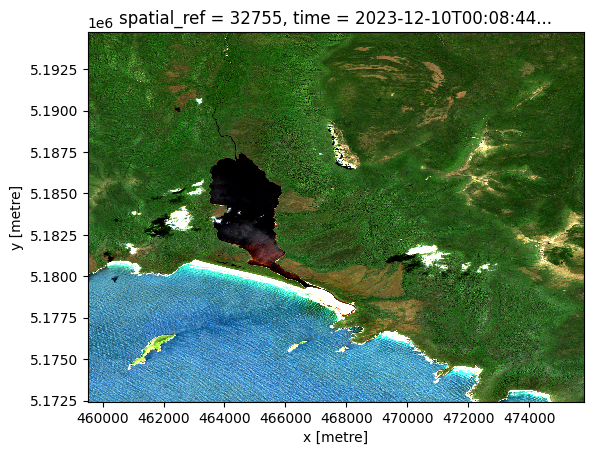

In [1]:
from pystac_client import Client
from odc.stac import load

client = Client.open("https://earth-search.aws.element84.com/v1")
collection = "sentinel-2-l2a"
tas_bbox = [146.5, -43.6, 146.7, -43.4]
search = client.search(collections=[collection], bbox=tas_bbox, datetime="2023-12")

data = load(search.items(), bbox=tas_bbox, groupby="solar_day", chunks={})
data[["red", "green", "blue"]].isel(time=2).to_array().plot.imshow(robust=True)